In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../databases/HYDROSWOT_100m_acc_clim_lc_beck.csv", sep=";")

In [3]:
data.columns

Index(['site_no', 'station_name', 'lon', 'lat', 'flowacc', 'stage', 'W', 'dH',
       'dA', 'U', 'clay', 'sand', 'silt', 'PA', 'TA', 'LC1', 'LC2', 'LC3',
       'LC4', 'LC5', 'LC6', 'LC7', 'LC8', 'LC9', 'LC10', 'LC11', 'LC12',
       'Q5_GSCD', 'Q10_GSCD', 'Q20_GSCD', 'QMEAN_GSCD', 'Q80_GSCD', 'Q90_GSCD',
       'Q95_GSCD', 'Q'],
      dtype='object')

In [62]:
river_means=data.groupby("site_no", as_index=False).mean()
river_medians=data.groupby("site_no", as_index=False).median()

# Analyses Kevin

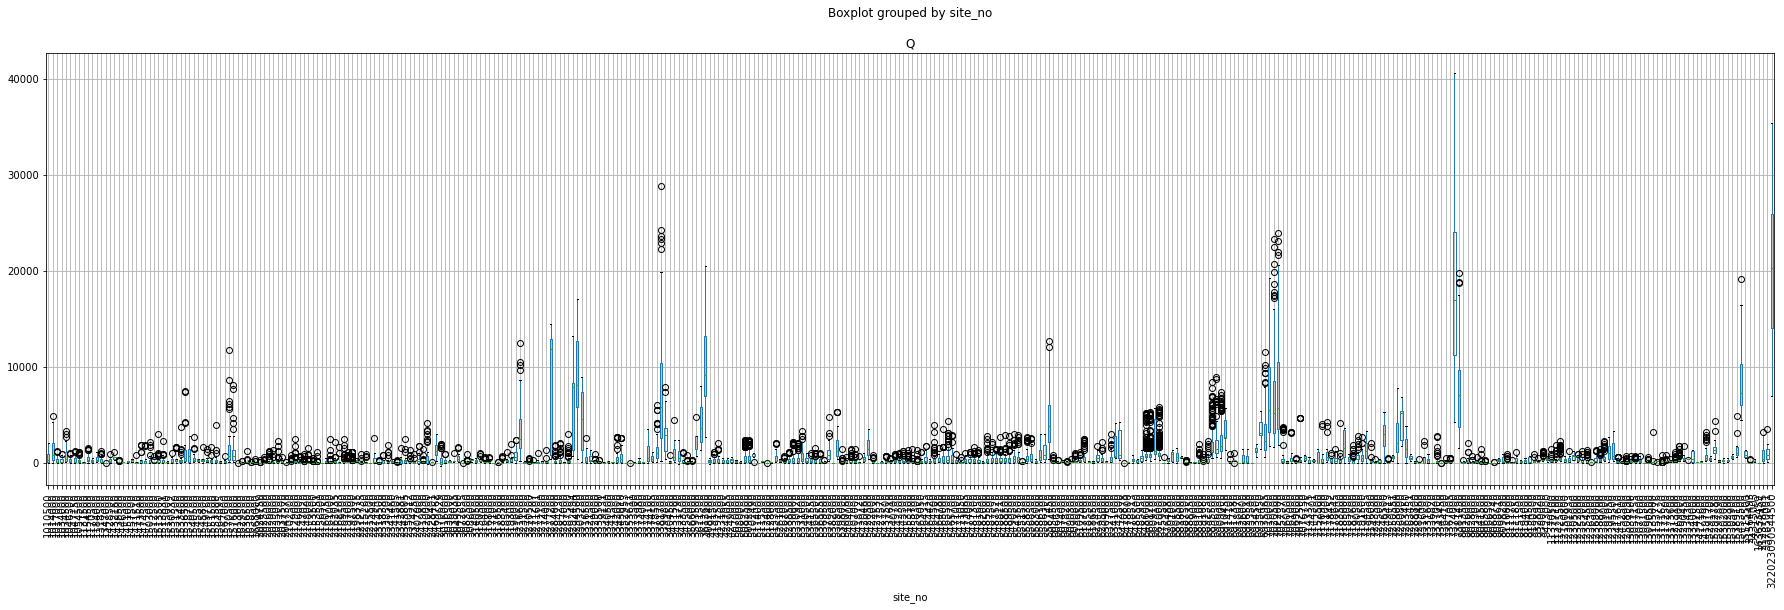

In [5]:
data.boxplot("Q", "site_no", figsize=(30,8), rot=90);

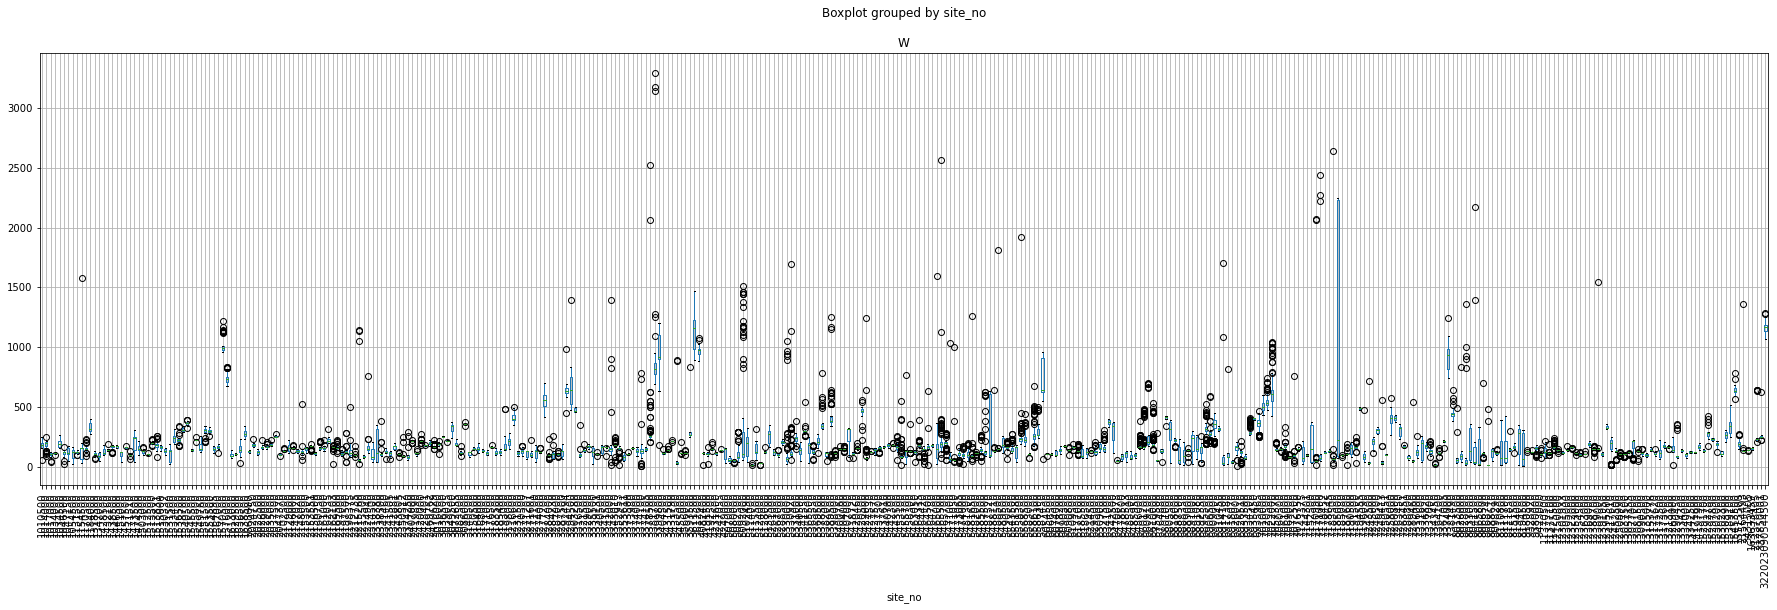

In [6]:
data.boxplot("W", "site_no", figsize=(30,8), rot=90);

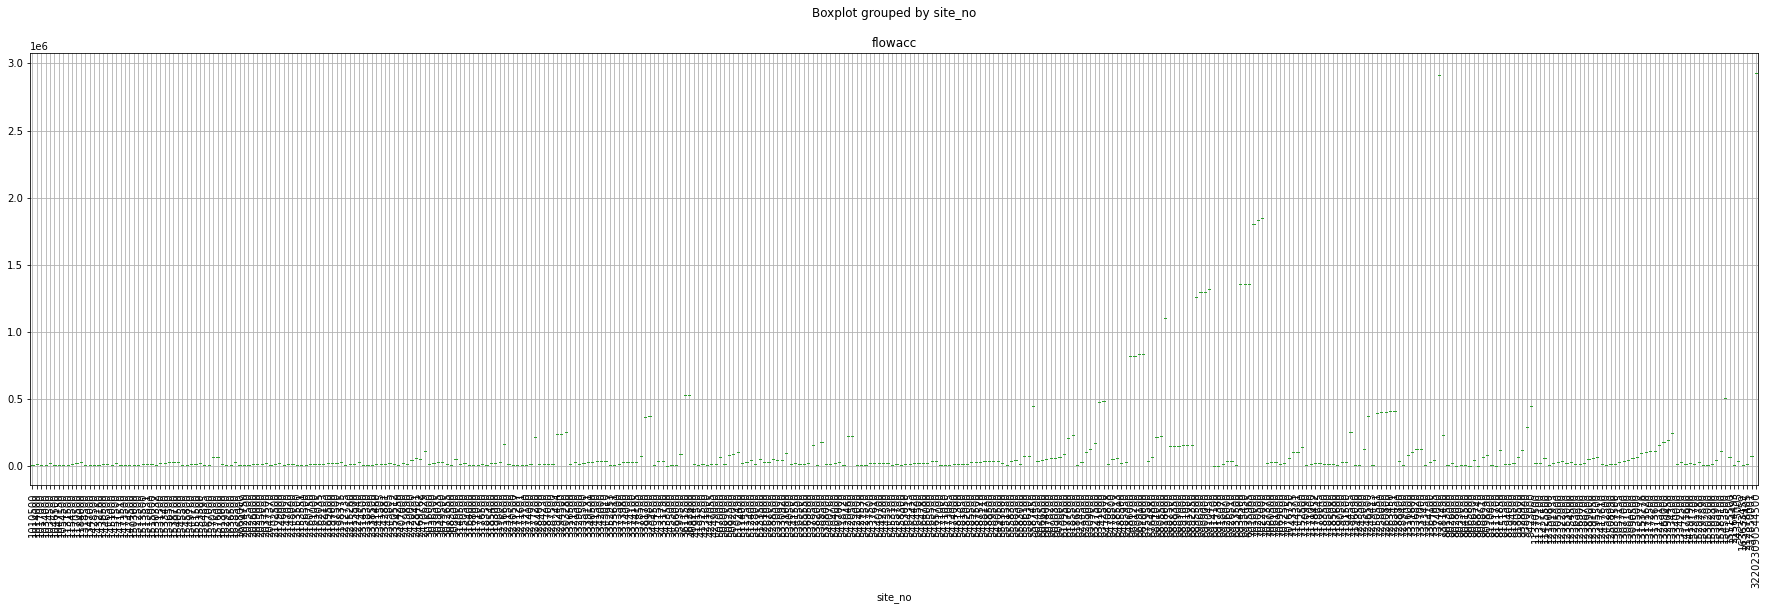

In [7]:
data.boxplot("flowacc", "site_no", figsize=(30,8), rot=90);

# Analyses Quentin

In [9]:
data.head()

,site_no,station_name,lon,lat,flowacc,stage,W,dH,dA,U,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
0,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.331720,196.2912,1.938528,240.439534,0.347472,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,56.916862
1,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.654808,219.4560,2.261616,300.786608,0.667512,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,87.782224
2,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.712720,190.5000,2.319528,312.657294,0.966216,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,529.525031
3,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,6.263640,202.3872,5.870448,1033.768321,1.996440,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,2500.377554
4,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,7.150608,206.0448,6.757416,1220.685874,2.209800,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,3228.120511


In [56]:
print(np.shape(data))
n=np.shape(data)[0]

(16828, 35)


## Statistiques descriptives

In [31]:
StJohnRiverData = data[slice(0,40,1)] #Récupération des données de la première station
StJohnRiverData.head()
X=np.arange(0,40,1)

### Aire draînée (flowacc)

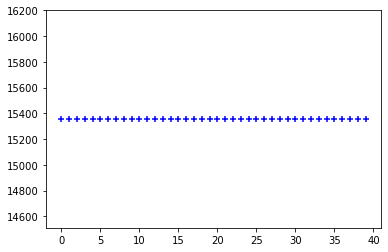

In [35]:
SJR_F = StJohnRiverData.flowacc
plt.scatter(X, SJR_F, color='blue', marker='+')
plt.show()

### Élévation (stage)

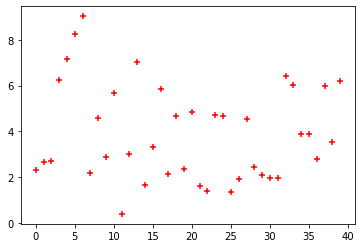

In [36]:
SJR_S = StJohnRiverData.stage
plt.scatter(X, SJR_S, color='red', marker='+')
plt.show()

### Largeur (W)

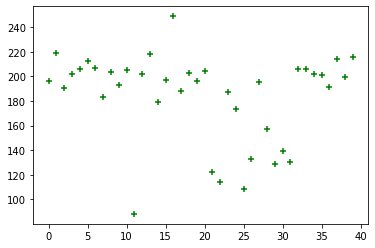

In [37]:
SJR_W = StJohnRiverData.W
plt.scatter(X, SJR_W, color='green', marker='+')
plt.show()

### Débit (Q)

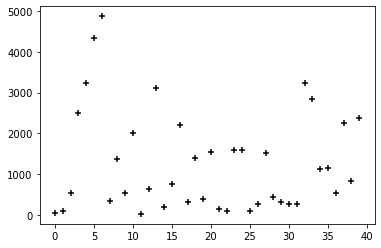

In [38]:
SJR_Q = StJohnRiverData.Q
plt.scatter(X, SJR_Q, color='black', marker='+')
plt.show()

## Analyse en Composantes Principales (ACP)

In [17]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

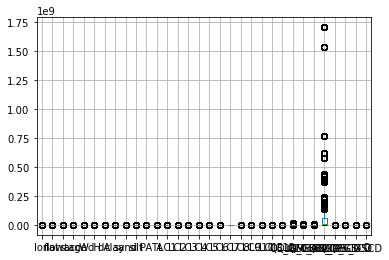

In [40]:
dataM = data.drop(columns=['site_no', 'station_name', 'U']) #remove site_no & station_name & U
dataM.boxplot()

In [49]:
sc = StandardScaler()
dataS = sc.fit_transform(dataM) #standardisation des données
print(np.mean(dataS,axis=0)) #verif mean=0
print(np.std(dataS,axis=0,ddof=0)) #verif sd=1

[-3.34412792e-16  6.38424421e-16  1.33427326e-16  4.13793607e-17
  5.57354654e-17 -4.01126455e-18 -2.82899711e-17  4.72906979e-17
  1.18226745e-16 -2.21252908e-16 -1.13159884e-16 -2.56720931e-16
 -4.56017444e-17 -2.36453489e-17  3.54680234e-17  7.93808143e-17
 -4.75018171e-19 -7.34694771e-17 -7.93808143e-17 -6.24912794e-17
 -1.21604652e-16 -2.53343024e-17  5.23575584e-17 -1.44405524e-16
 -2.78677327e-17 -7.26250003e-17 -1.60450582e-17  2.36453489e-17
  1.22449128e-17 -6.33357561e-18 -2.40675873e-17  9.79593028e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [59]:
acp = PCA(svd_solver='full')
coord = acp.fit_transform(dataS)
print(acp.n_components_)
print(acp.explained_variance_)
eigval = (n-1)/n*acp.explained_variance_
print(eigval)
print(acp.explained_variance_ratio_)
p=acp.n_components_

32
[8.98164792e+00 4.08499054e+00 2.80455091e+00 2.19665913e+00
 1.83128653e+00 1.49050306e+00 1.36442570e+00 1.24312666e+00
 1.01417302e+00 9.41783742e-01 8.23398954e-01 7.50355716e-01
 6.67120854e-01 6.55148449e-01 5.72889178e-01 5.37461846e-01
 4.99430807e-01 4.65784421e-01 3.67268423e-01 2.80812410e-01
 2.51960290e-01 1.00232740e-01 4.52551810e-02 1.81692668e-02
 1.07592548e-02 1.84228702e-03 3.83968045e-04 3.10426185e-04
 1.15137052e-04 4.12688962e-05 1.22359024e-05 1.39332118e-06]
[8.98111418e+00 4.08474779e+00 2.80438425e+00 2.19652859e+00
 1.83117771e+00 1.49041449e+00 1.36434462e+00 1.24305279e+00
 1.01411275e+00 9.41727777e-01 8.23350024e-01 7.50311126e-01
 6.67081211e-01 6.55109517e-01 5.72855134e-01 5.37429908e-01
 4.99401129e-01 4.65756742e-01 3.67246598e-01 2.80795723e-01
 2.51945317e-01 1.00226784e-01 4.52524917e-02 1.81681871e-02
 1.07586155e-02 1.84217755e-03 3.83945227e-04 3.10407738e-04
 1.15130210e-04 4.12664438e-05 1.22351753e-05 1.39323838e-06]
[2.80659818e-01 1.2

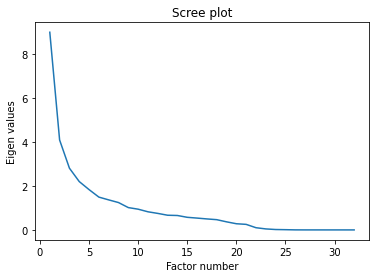

In [61]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

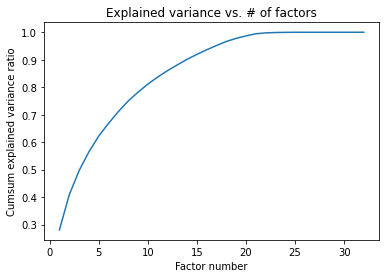

In [64]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## Clustering

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
river_means_M=river_means.drop(columns=['site_no'])
Z = linkage(river_means.Q,method='ward',metric='euclidean')

ValueError: Length n of condensed distance matrix 'y' must be a binomial coefficient, i.e.there must be a k such that (k \choose 2)=n)!

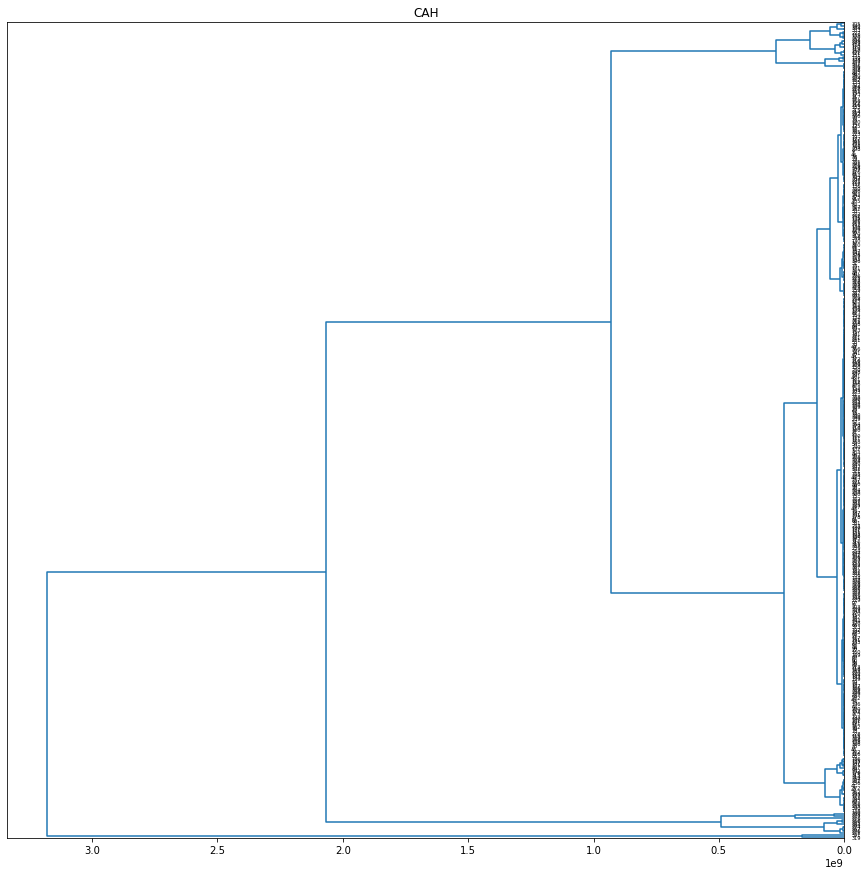

In [54]:
fig = plt.figure(figsize=(15,15))
plt.title("CAH")
dendrogram(Z,orientation='left',color_threshold=0)
plt.show()